In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("reduced_version_data_ENEL_645.csv")

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['Sector'].value_counts()

In [ ]:
df['Community Name'].value_counts().head(10)

In [ ]:
df['Group Category'].value_counts()

In [ ]:
df['Category'].value_counts().head(10)

In [ ]:
df['Month'].value_counts()

In [ ]:
df['Crime Count'].describe()

In [ ]:
df['Resident Count'].describe()

In [ ]:
df['Year'].describe()

In [ ]:
df.corr()

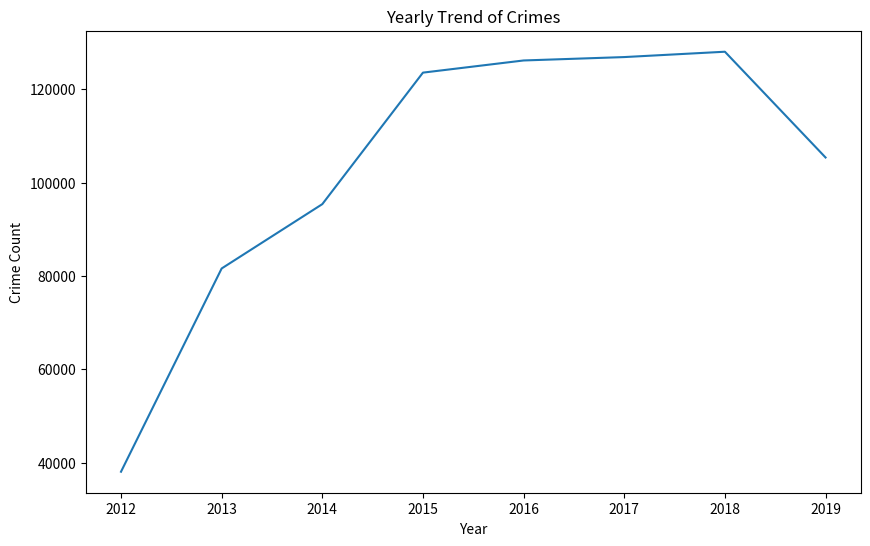

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Yearly trend of crimes
yearly_crimes = df.groupby('Year')['Crime Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_crimes, x='Year', y='Crime Count')
plt.title('Yearly Trend of Crimes')
plt.show()

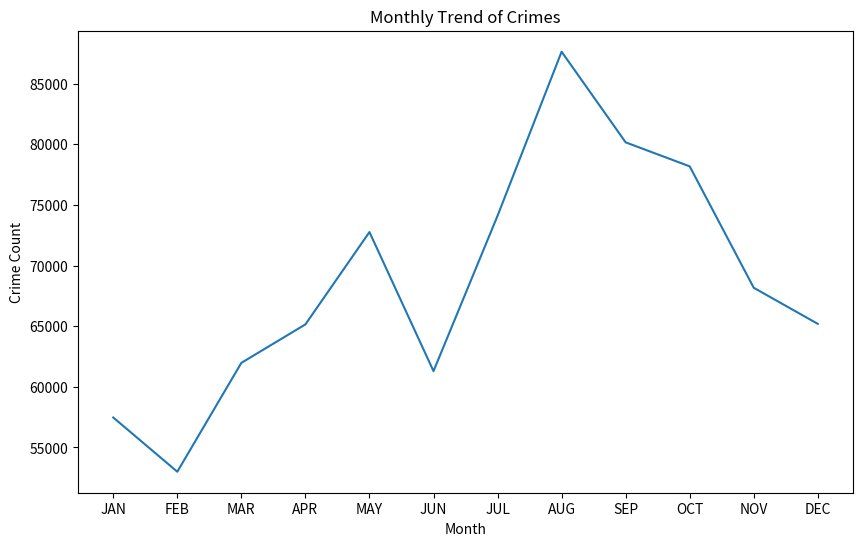

In [ ]:
# Monthly trend of crimes
monthly_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_crimes = df.groupby('Month')['Crime Count'].sum().reindex(monthly_order).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_crimes, x='Month', y='Crime Count')
plt.title('Monthly Trend of Crimes')
plt.show()

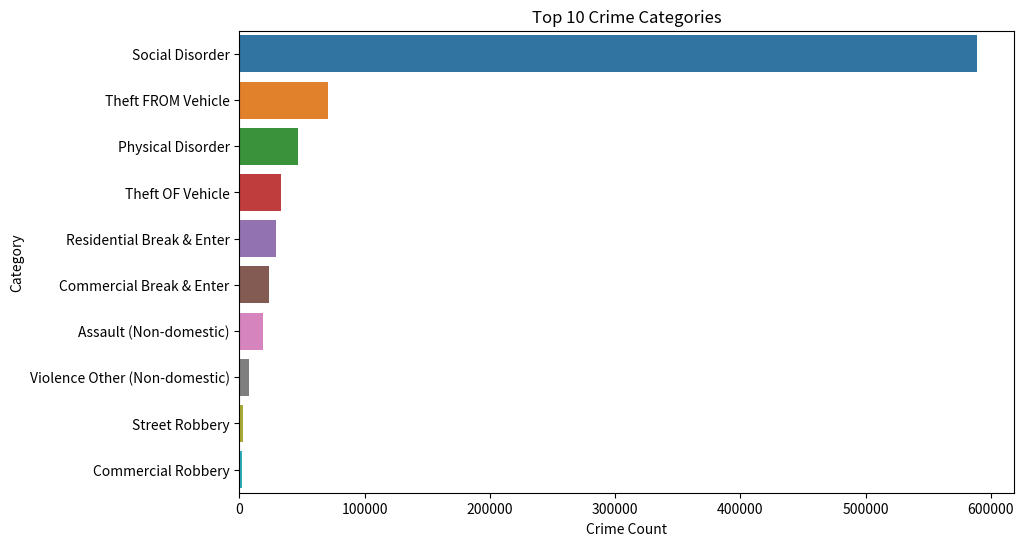

In [ ]:
# Top crime categories
top_categories = df.groupby('Category')['Crime Count'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories, x='Crime Count', y='Category')
plt.title('Top 10 Crime Categories')
plt.show()

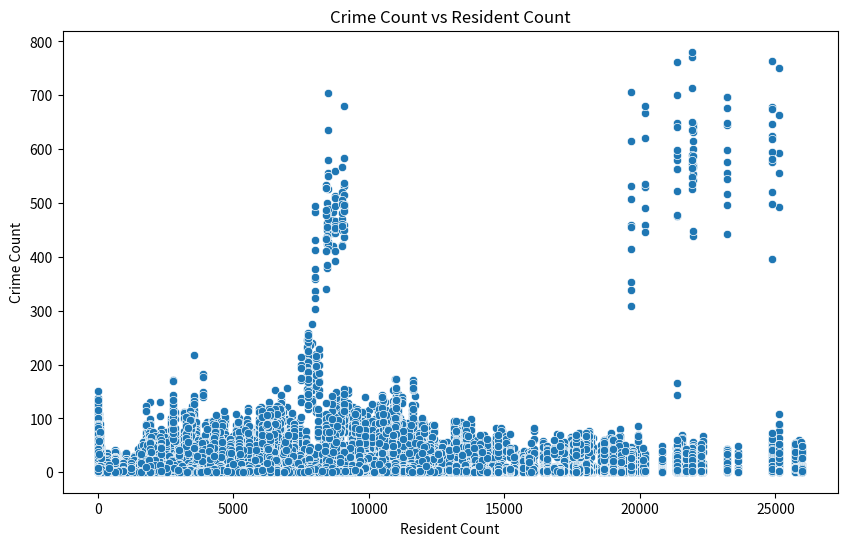

In [ ]:
# Scatter plot of Crime Count vs Resident Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Resident Count', y='Crime Count')
plt.title('Crime Count vs Resident Count')
plt.show()

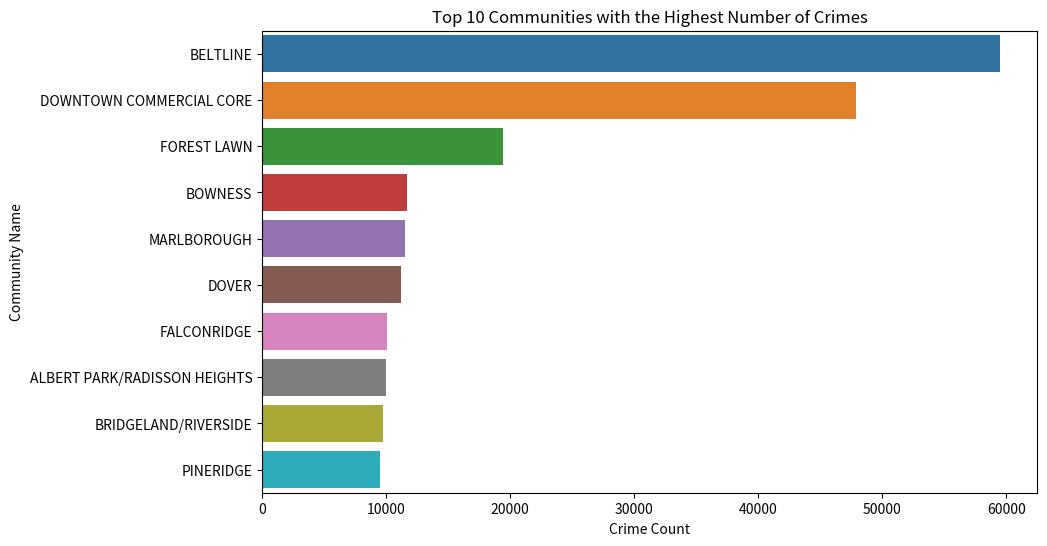

In [ ]:
# Top communities with the highest number of crimes
top_communities = df.groupby('Community Name')['Crime Count'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_communities, x='Crime Count', y='Community Name')
plt.title('Top 10 Communities with the Highest Number of Crimes')
plt.show()

<AxesSubplot: xlabel='Year'>

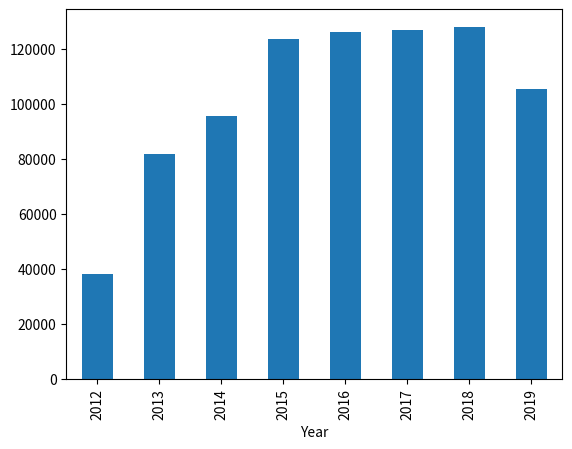

In [ ]:
df.groupby('Year')['Crime Count'].sum().plot(kind='bar')

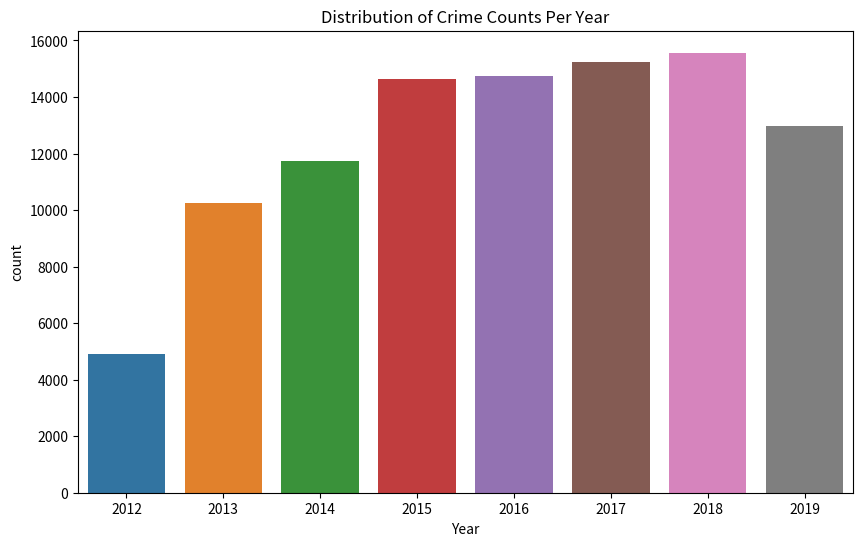

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Crime Counts Per Year')
plt.show()

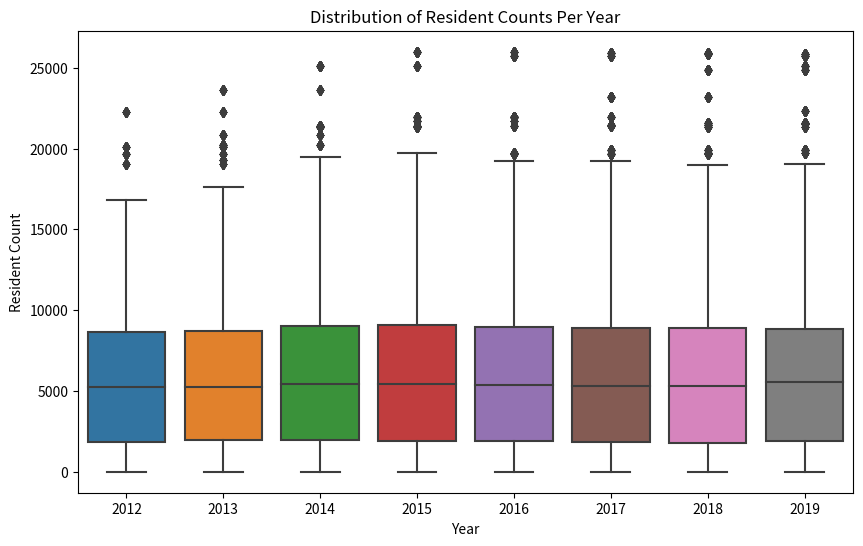

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Resident Count', data=df)
plt.title('Distribution of Resident Counts Per Year')
plt.show()

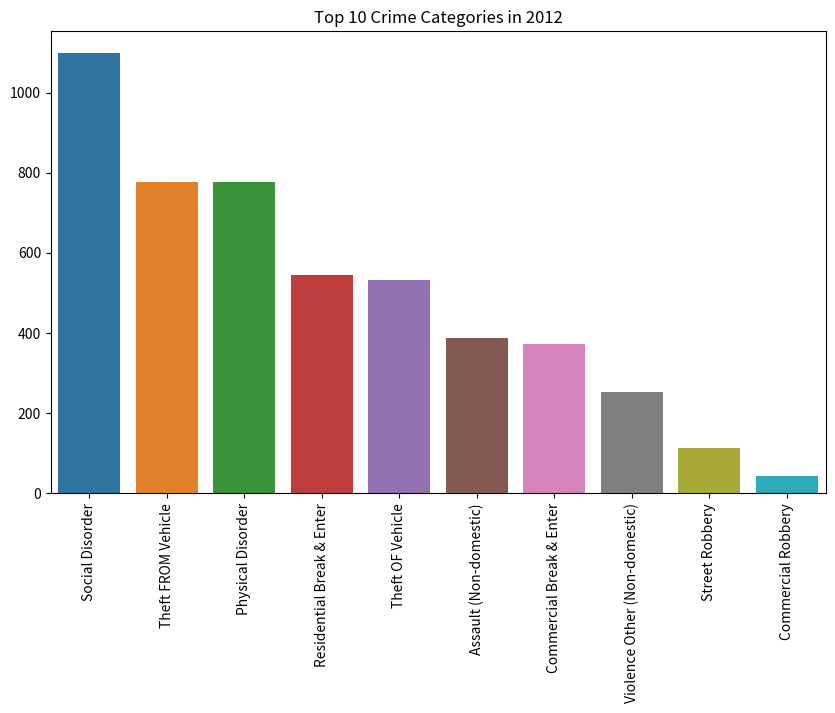

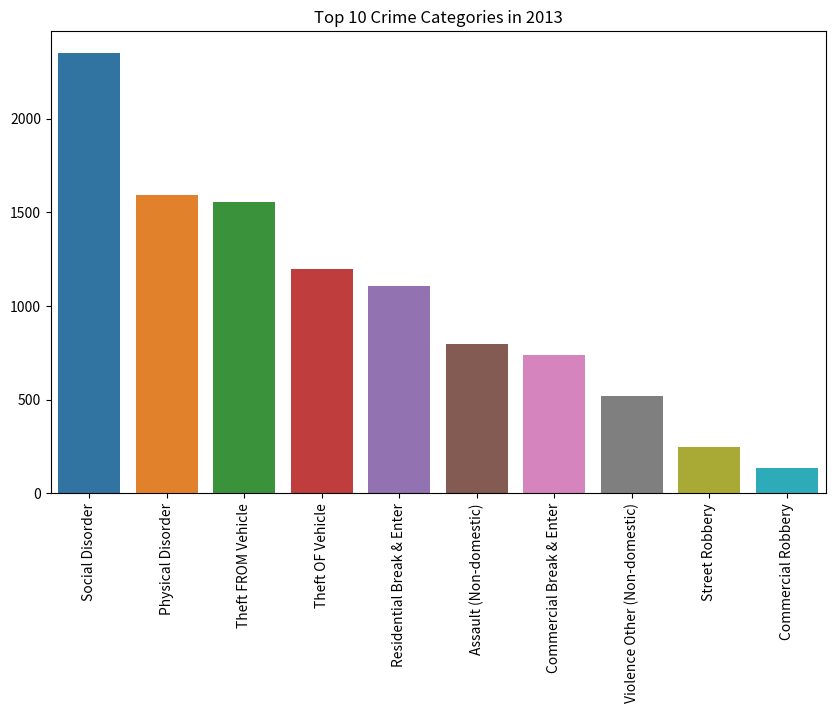

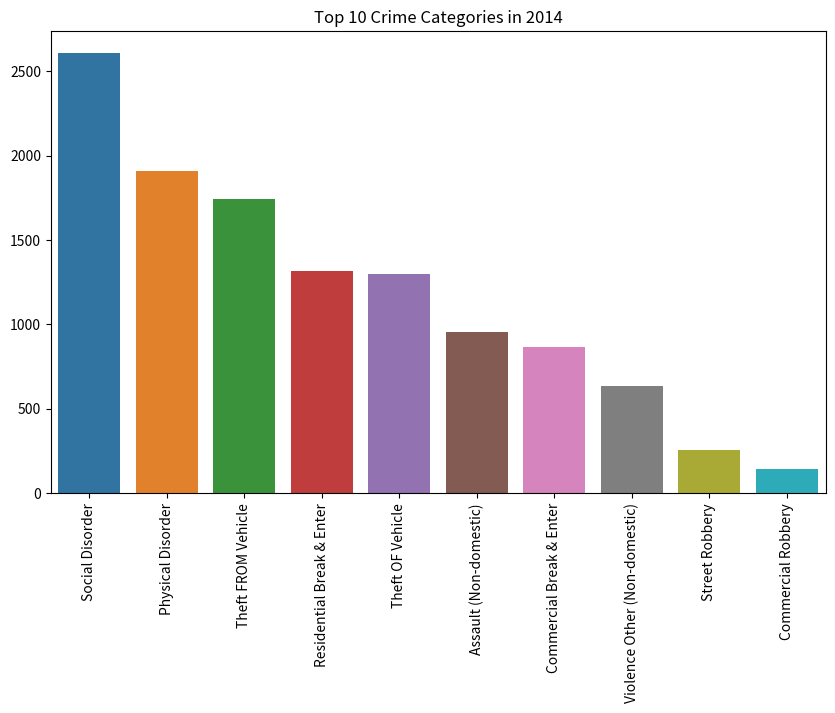

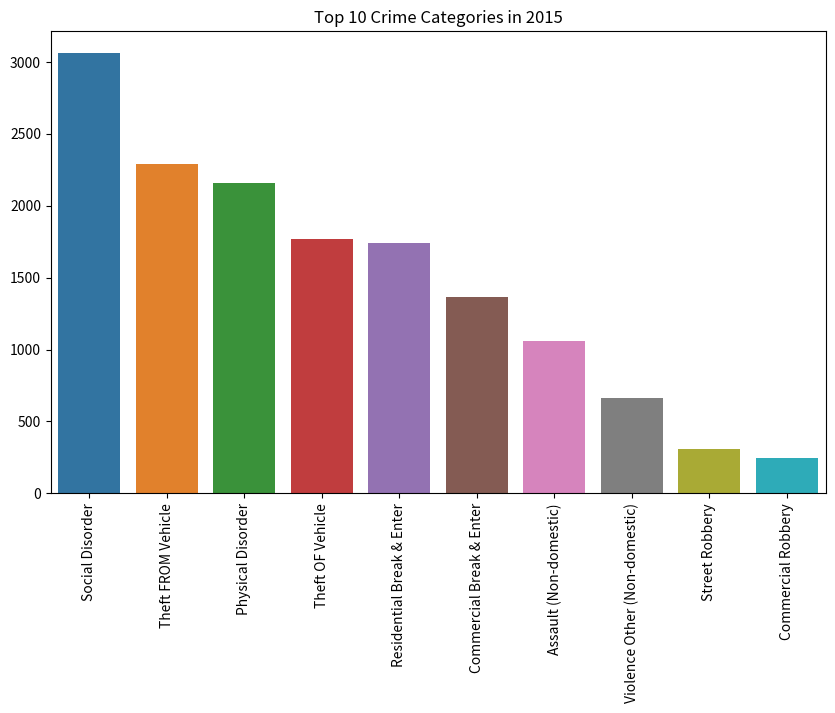

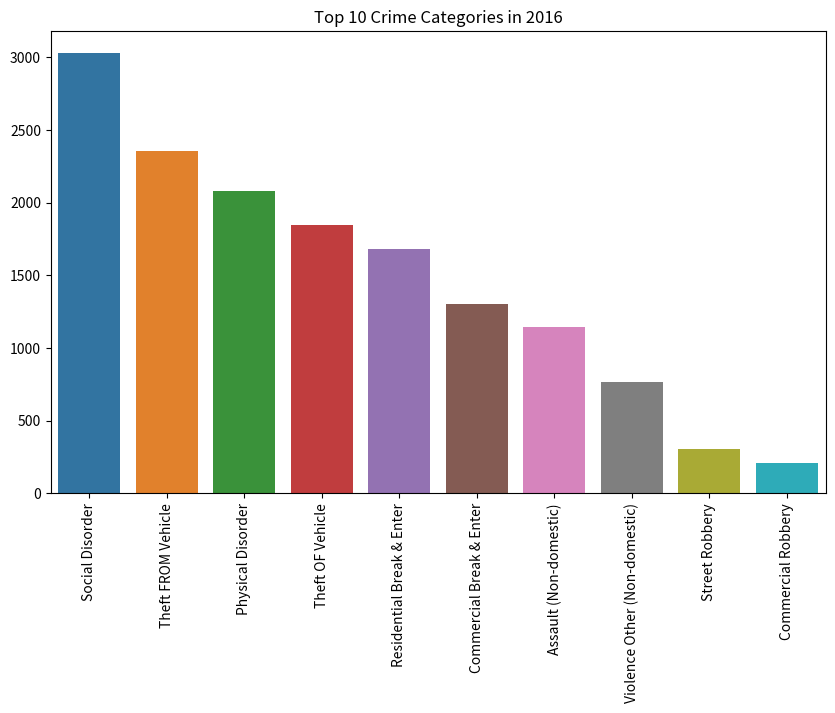

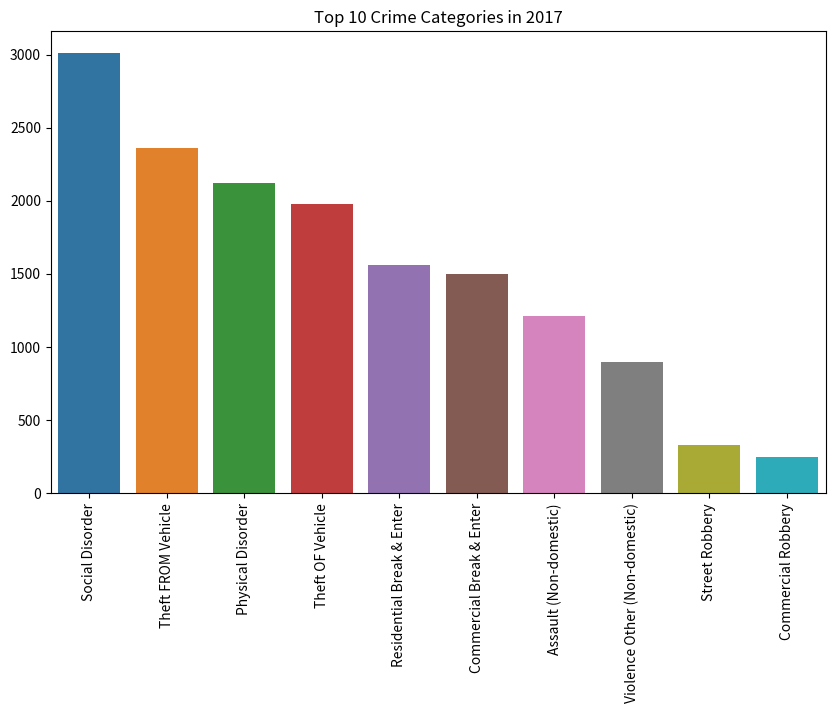

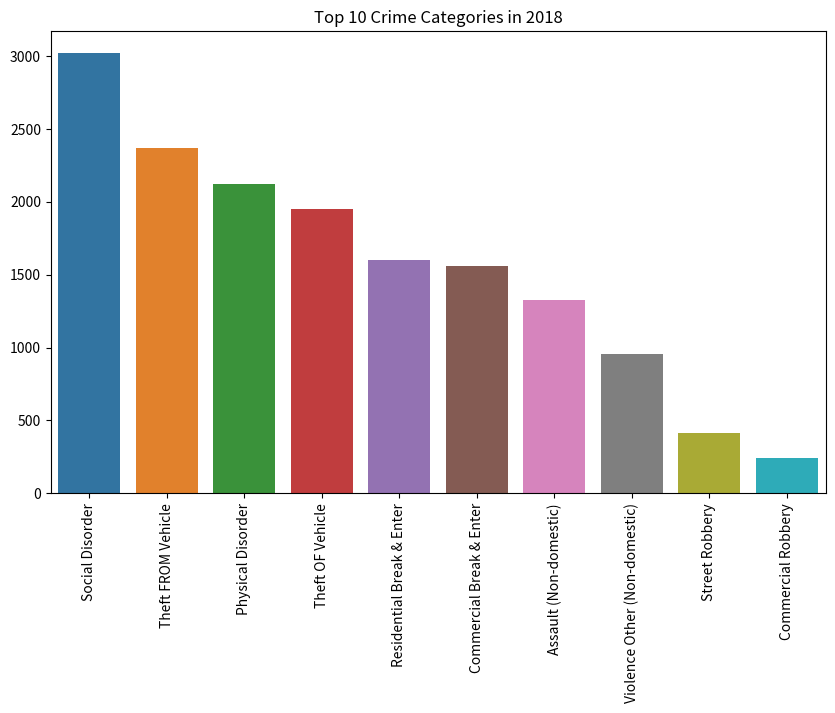

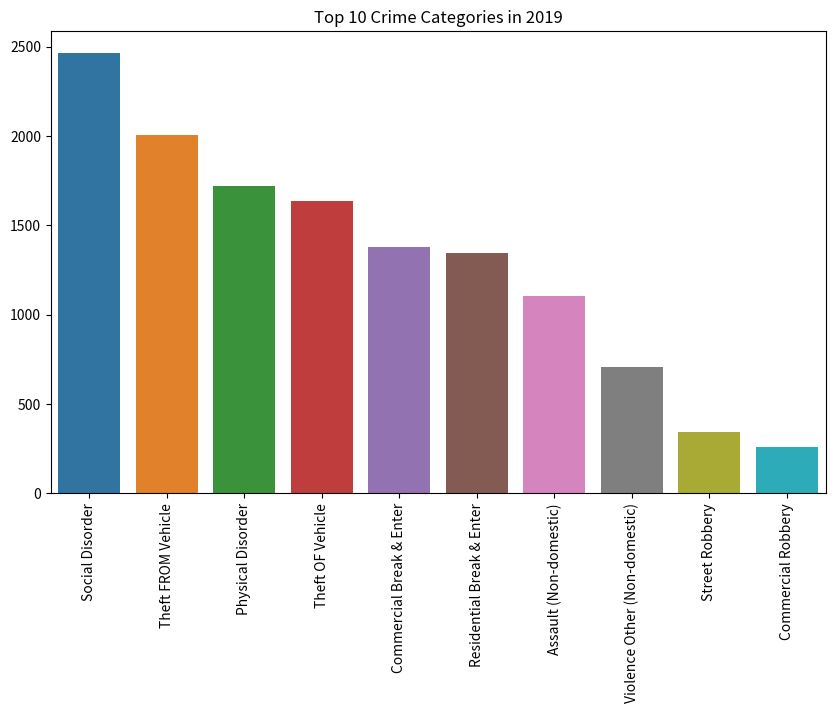

In [ ]:
years = df['Year'].unique()
for year in sorted(years):
    plt.figure(figsize=(10, 6))
    top_categories = df[df['Year'] == year]['Category'].value_counts().head(10)
    sns.barplot(x=top_categories.index, y=top_categories.values)
    plt.title(f'Top 10 Crime Categories in {int(year)}')
    plt.xticks(rotation=90)
    plt.show()

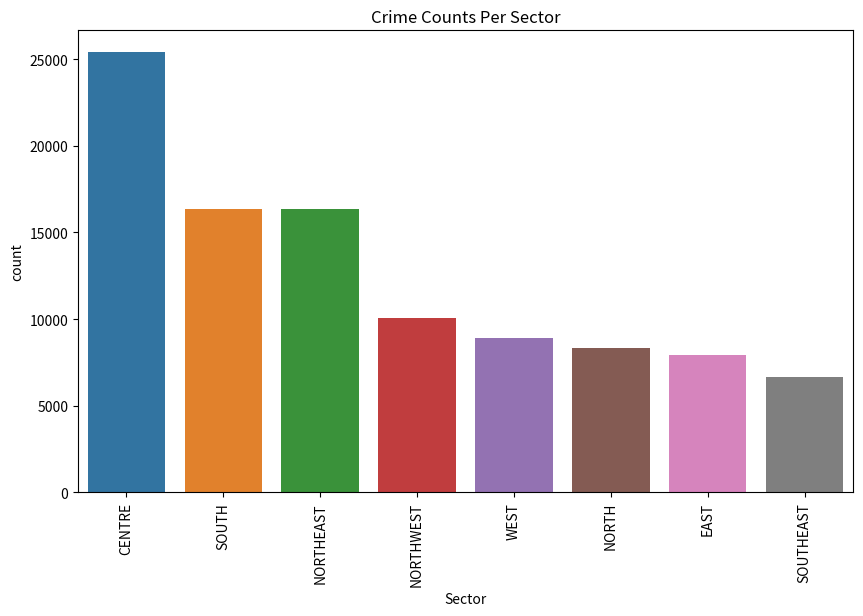

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
plt.title('Crime Counts Per Sector')
plt.xticks(rotation=90)
plt.show()

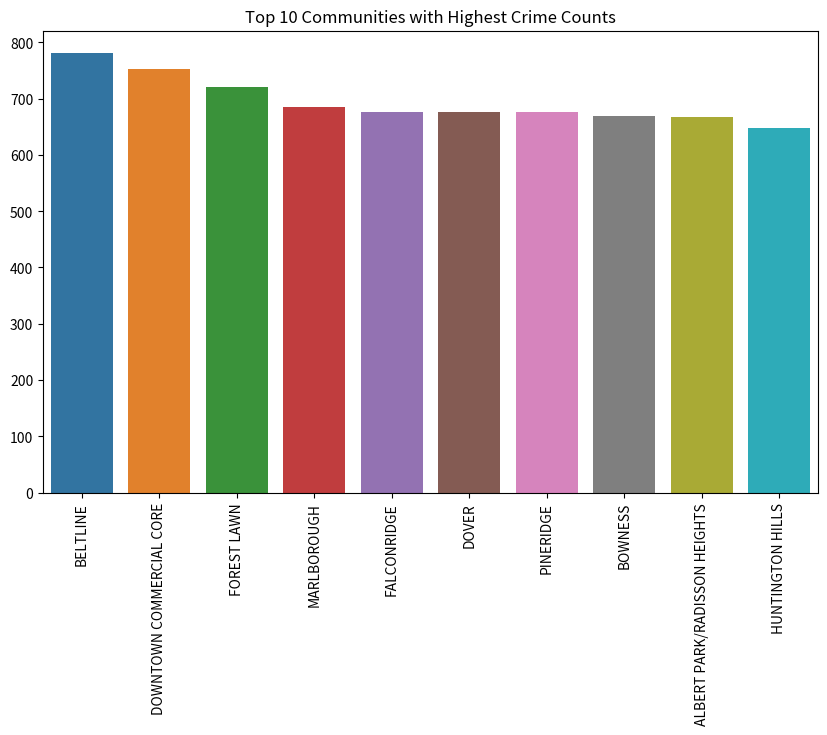

In [ ]:
plt.figure(figsize=(10, 6))
top_communities = df['Community Name'].value_counts().head(10)
sns.barplot(x=top_communities.index, y=top_communities.values)
plt.title('Top 10 Communities with Highest Crime Counts')
plt.xticks(rotation=90)
plt.show()

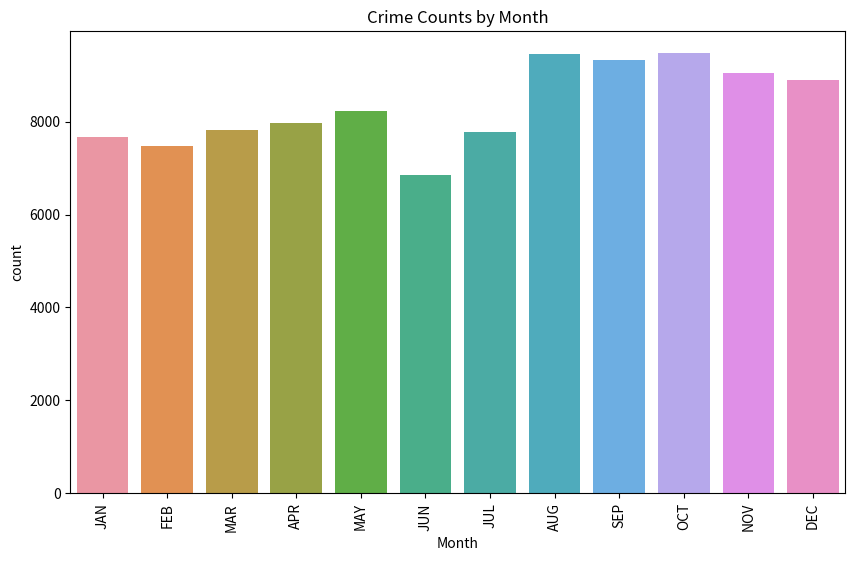

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.title('Crime Counts by Month')
plt.xticks(rotation=90)
plt.show()

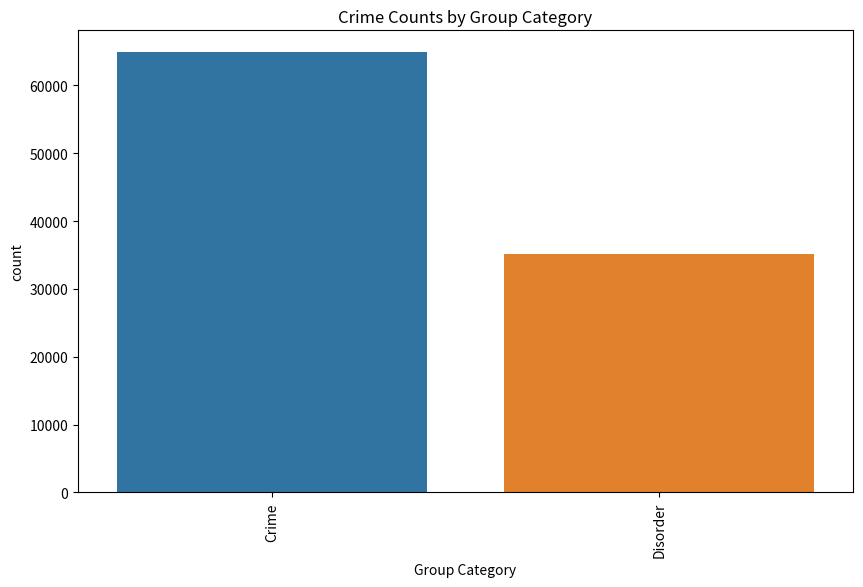

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Group Category', data=df)
plt.title('Crime Counts by Group Category')
plt.xticks(rotation=90)
plt.show()

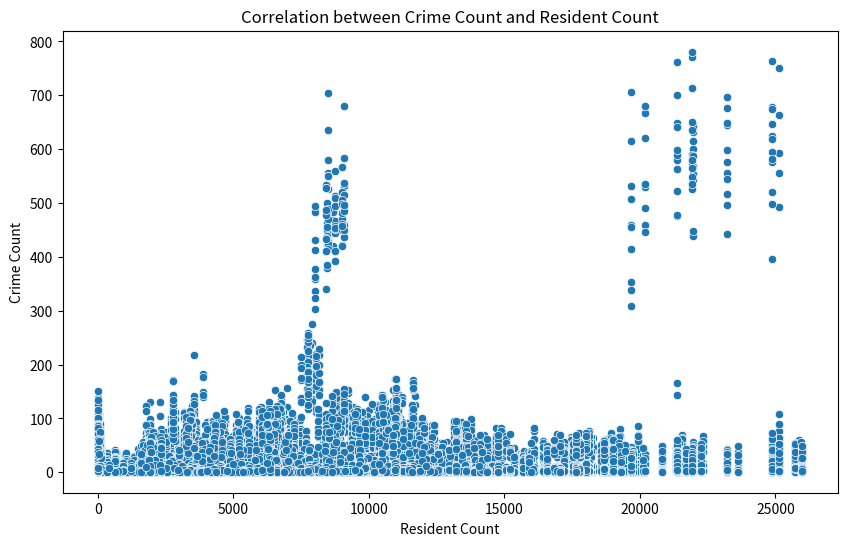

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Resident Count', y='Crime Count', data=df)
plt.title('Correlation between Crime Count and Resident Count')
plt.show()

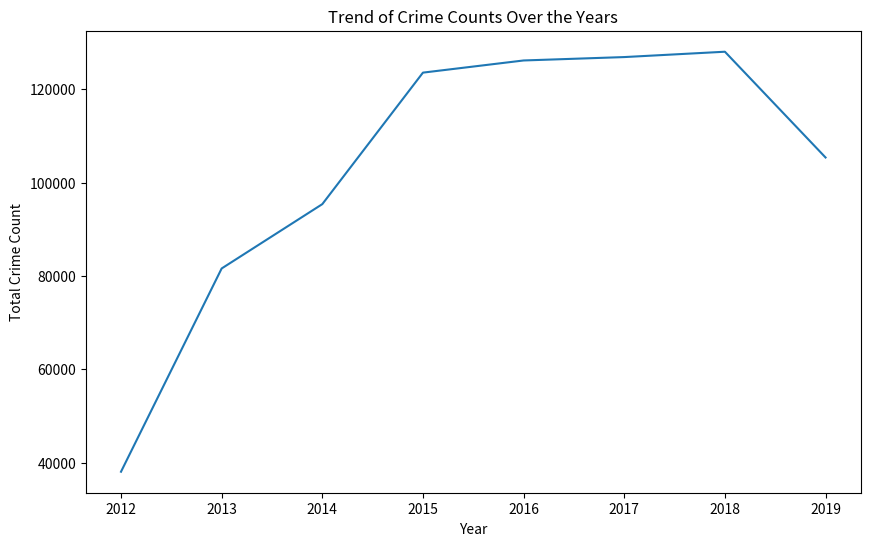

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Crime Count'].sum().plot(kind='line')
plt.title('Trend of Crime Counts Over the Years')
plt.ylabel('Total Crime Count')
plt.show()

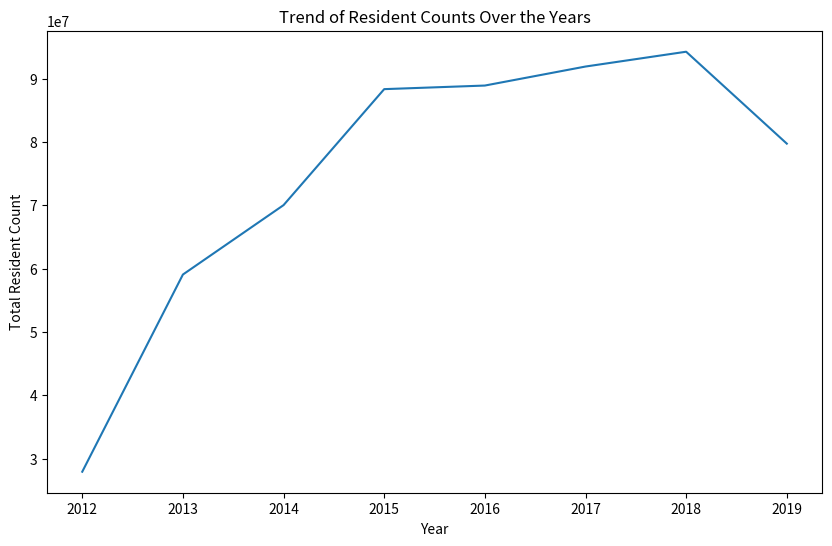

In [ ]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Resident Count'].sum().plot(kind='line')
plt.title('Trend of Resident Counts Over the Years')
plt.ylabel('Total Resident Count')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Define the columns to be one-hot encoded
columns_to_encode = ['Month', 'Sector', 'Group Category']
# For the 'Community Name' and 'Category' columns, we'll limit the one-hot encoding to the top 10 most common values
top_10_communities = df['Community Name'].value_counts().index[:10]
top_10_categories = df['Category'].value_counts().index[:10]
df['Community Name'] = np.where(df['Community Name'].isin(top_10_communities), df['Community Name'], 'OTHER')
df['Category'] = np.where(df['Category'].isin(top_10_categories), df['Category'], 'OTHER')
columns_to_encode.extend(['Community Name', 'Category'])
# Perform one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')
X = df.drop('Crime Count', axis=1)
y = df['Crime Count']
X = ct.fit_transform(X)
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(475.90957704836615, 8.087965492373227)

In [ ]:
# Create interaction features
df['Year_Month'] = df['Year'].astype(str) + '_' + df['Month']
df['Community_Category'] = df['Community Name'] + '_' + df['Category']
# Update the columns to be one-hot encoded
columns_to_encode.extend(['Year_Month', 'Community_Category'])
# Perform one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')
X = df.drop('Crime Count', axis=1)
y = df['Crime Count']
X = ct.fit_transform(X)
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(109.6406622239965, 5.533104724613064)

In [ ]:
# Create a datetime column from the Year and Month columns
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))
# Sort the dataframe by Date
df.sort_values('Date', inplace=True)
# Check if we have a continuous time series without missing months
all_months = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='M')
missing_months = all_months[~all_months.isin(df['Date'])]
missing_months

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Train a random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(40.39385100606632, 2.6571060623620344)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
# Handle any potential NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Train a random forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_imputed, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse, mae

(40.39385100606632, 2.6571060623620344)